In [43]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

In [44]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

In [45]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

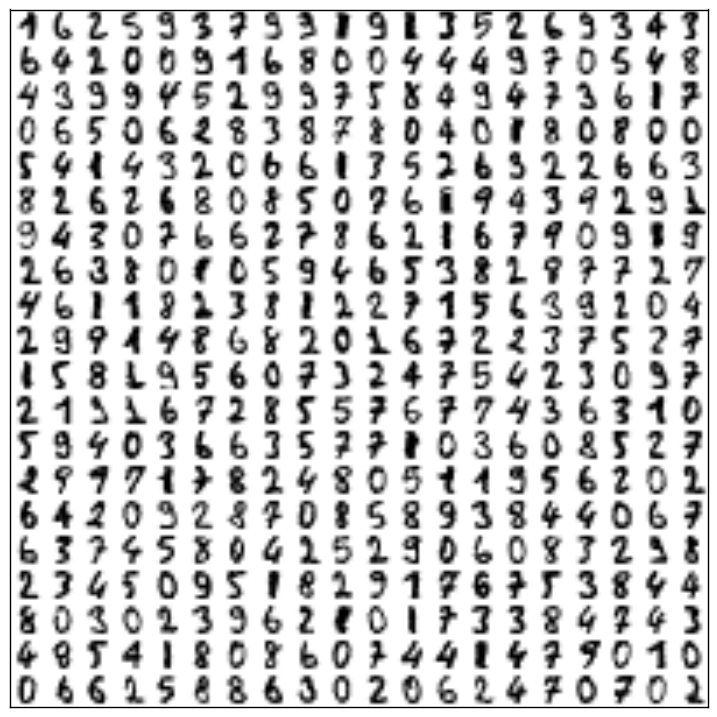

In [46]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in range(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
plot_digits(X_projected, digits.target)

In [ ]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
plot_digits(X_pca, digits.target)

In [ ]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

In [ ]:
X_iso = manifold.Isomap(30, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

In [ ]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

In [ ]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

In [ ]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
plot_digits(X_tsne, digits.target)

In [47]:
def nearestPoints(knownData,testData,k):
    D1 = np.sum(np.square(knownData),axis = 1,keepdims=True)
    D2 = np.sum(np.square(testData),axis = 1,keepdims=True).T
    M = D1 + D2 - 2. * np.dot(knownData,testData.T)
    #print M
    return np.asarray(np.argsort(M,axis=0)[:k,:].T)
    

def KNN(knownData, testData, knownClass, testClass,k):
    error = 0
    nearest = nearestPoints(knownData,testData,k)
    #print nearest
    length = testData.shape[0]
    nearestClass = np.empty(length)
    error_list = []
    for i in range(0,length):
        #print i,nearest[i]
        nearestClass[i] = np.argmax(np.bincount([knownClass[a] for a in nearest[i]]))
        if(not(nearestClass[i] == testClass[i])):
           error += 1
           error_list = np.append(error_list, [i])
    return error, error_list

In [48]:
def crossValidation(data,dataClass,k):
    size = data.shape[0]
    arr = np.arange(size)
    np.random.shuffle(arr)
    err = 0
    n = int(size/10)
    for i in range(10):
        mask2 = arr[np.arange(i*n,min((i+1)*n,size))]
        mask1 = arr[np.concatenate((np.arange(i*n),np.arange((i+1)*n,size)))]
        er = KNN(data[mask1],data[mask2],dataClass[mask1],dataClass[mask2],k)
        #print er
        err += er[0]
    return float(err)/(size) * 100

In [49]:
def everything(X,Xclass,name):
    x1,x2 = zip(*np.random.permutation(zip(X,Xclass)))
    X1, X1class = np.asarray(x1),np.asarray(x2)
    print "Dla metody", name
    for i in range(1,5):
        print "Dla",i, crossValidation(X1,X1class,i),"%"

In [50]:
everything(X,y, "nieprzerobionych danych")

Dla metody nieprzerobionych danych
Dla 1 1.05731775181 %
Dla 2 1.50250417362 %
Dla 3 1.16861435726 %
Dla 4 1.33555926544 %


In [ ]:
for i in range(2,21,2):
    #everything(X,y, "nieprzerobionych danych")
    print "Odpalamy metody dla n_components=",i
    X_projected = random_projection.SparseRandomProjection(n_components=i).fit_transform(X)
    X_pca = decomposition.PCA(n_components=i).fit_transform(X)
    X_kpca = decomposition.KernelPCA(n_components=i, kernel="rbf", gamma=10).fit_transform(X)
    X_iso = manifold.Isomap(30, n_components=i).fit_transform(X)
    X_lle = manifold.LocallyLinearEmbedding(30, n_components=i).fit_transform(X)
    X_mds = manifold.MDS(n_components=i, n_init=1, max_iter=100).fit_transform(X)
    X_tsne = manifold.TSNE(n_components=i, init='pca').fit_transform(X)
    everything(X_projected,y, "Sparse Random Projection")
    everything(X_iso,y,"Isomap")
    everything(X_kpca,y, "KernelPCA")
    everything(X_lle,y, "Locally Linear Embedding")
    everything(X_mds,y, "manifold MDE")
    everything(X_pca,y, "PCA")
    everything(X_tsne,y, "TSNE")
    

Odpalamy metody dla n_components= 2
Dla metody Sparse Random Projection
Dla 1 69.2821368948 %
Dla 2 69.7273233166 %
Dla 3 67.2787979967 %
Dla 4 64.3294379521 %
Dla metody Isomap
Dla 1 30.7178631052 %
Dla 2 30.1613800779 %
Dla 3 27.9910962716 %
Dla 4 25.8764607679 %
Dla metody KernelPCA
Dla 1 89.5937673901 %
Dla 2 89.9276572065 %
Dla 3 89.4824707846 %
Dla 4 91.040623261 %
Dla metody Locally Linear Embedding
Dla 1 57.9855314413 %
Dla 2 58.7089593767 %
Dla 3 53.3110740122 %
Dla 4 52.8102392877 %
Dla metody manifold MDE
Dla 1 36.9504730106 %
Dla 2 37.061769616 %
Dla 3 32.4429604897 %
Dla 4 31.2743461324 %
Dla metody PCA
Dla 1 40.5676126878 %
Dla 2 42.2927100723 %
Dla 3 40.0111296605 %
Dla 4 38.1190873678 %
Dla metody TSNE
Dla 1 1.83639398998 %
Dla 2 2.2815804118 %
Dla 3 1.89204229271 %
Dla 4 2.05898720089 %
Odpalamy metody dla n_components= 4
Dla metody Sparse Random Projection
Dla 1 46.2993878687 %
Dla 2 47.6905954368 %
Dla 3 43.795214246 %
Dla 4 42.1257651642 %
Dla metody Isomap
Dla 1 6.